## advancedXransform

### Author:  Sheneka Allen

In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the OS and JSON Modules
import os,json

In [2]:
# Specify folder for saving data in Python vs Jupyter Notebook
folder = "Data/"
os.makedirs(folder, exist_ok=True)

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS1ZstYLwFgwhZnqDsPjtnlHYhJp_cmW55J8JD5mym0seRsaem3px7QBtuFF0LiI7z1PLCkVKAkdO7J/pub?output=csv')
df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [4]:
df1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSzdWOBaXOoz52vPmCFV5idNlDBohLY1Lsbc1IfZIZQ7cV_aNB2wYBfhF49uE1TaO1B5MQCGWiNrFfd/pub?output=csv')
df1.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [5]:
# explore and clean dataframes for transformation
df.isna().sum()

Hero|Publisher    0
Gender            0
Race              0
Alignment         0
Hair color        0
Eye color         0
Skin color        0
Measurements      0
dtype: int64

In [6]:
df1.isna().sum()

hero_names    0
Powers        0
dtype: int64

In [7]:
df.Measurements.value_counts()

{'Height': '183.0 cm', 'Weight': '90.0 kg'}     6
{'Height': '183.0 cm', 'Weight': '86.0 kg'}     6
{'Height': '178.0 cm', 'Weight': '79.0 kg'}     6
{'Height': '188.0 cm', 'Weight': '95.0 kg'}     6
{'Height': '180.0 cm', 'Weight': '81.0 kg'}     6
                                               ..
{'Height': '701.0 cm', 'Weight': '4.0 kg'}      1
{'Height': '185.0 cm', 'Weight': '89.0 kg'}     1
{'Height': '259.0 cm', 'Weight': '158.0 kg'}    1
{'Height': '191.0 cm', 'Weight': '65.0 kg'}     1
{'Height': '66.0 cm', 'Weight': '17.0 kg'}      1
Name: Measurements, Length: 287, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [10]:
df.Race.value_counts()

Human                156
Unknown              145
Mutant                51
Human / Radiation     11
Android                7
Symbiote               7
Alien                  6
Demon                  6
Cyborg                 6
Kryptonian             5
Atlantean              5
Asgardian              5
Inhuman                4
New God                3
Human-Kree             2
Eternal                2
Demi-God               2
Saiyan                 2
Amazon                 2
Human / Altered        2
Metahuman              2
God / Eternal          2
Human-Vulcan           1
Martian                1
Zombie                 1
Korugaran              1
Talokite               1
Clone                  1
Human-Spartoi          1
Animal                 1
Yautja                 1
Human / Cosmic         1
Tamaranean             1
Mutant / Clone         1
Luphomoid              1
Frost Giant            1
Strontian              1
Czarnian               1
Bolovaxian             1
Human-Vuldarian        1


In [11]:
df.Gender.value_counts()

Male       321
Female     134
Unknown      8
Name: Gender, dtype: int64

In [12]:
df.Alignment.value_counts()

good       311
bad        132
neutral     17
Unknown      3
Name: Alignment, dtype: int64

In [13]:
df['Hair color'].value_counts()

Black               127
Blond                74
Brown                69
No Hair              52
Red                  41
White                22
Unknown              18
Auburn               13
Green                 6
Strawberry Blond      5
Purple                4
Brown / White         4
Grey                  4
black                 3
blond                 3
Silver                3
Blue                  2
Orange                2
Pink                  1
Gold                  1
Red / White           1
Indigo                1
Red / Orange          1
Red / Grey            1
Brownn                1
Yellow                1
Orange / White        1
Magenta               1
Black / Blue          1
Name: Hair color, dtype: int64

In [14]:
df['Hair color'] = df['Hair color'].replace('Brownn','Brown')
df['Hair color'] = df['Hair color'].replace('black', 'Black')
df['Hair color'] = df['Hair color'].replace('blond','Blond')
df['Hair color'].value_counts()

Black               130
Blond                77
Brown                70
No Hair              52
Red                  41
White                22
Unknown              18
Auburn               13
Green                 6
Strawberry Blond      5
Purple                4
Brown / White         4
Grey                  4
Silver                3
Blue                  2
Orange                2
Pink                  1
Gold                  1
Red / White           1
Indigo                1
Red / Orange          1
Red / Grey            1
Yellow                1
Orange / White        1
Magenta               1
Black / Blue          1
Name: Hair color, dtype: int64

In [15]:
df['Eye color'].value_counts()

blue                       182
brown                      102
green                       61
red                         38
Unknown                     17
yellow                      13
black                       12
white                       10
grey                         5
hazel                        5
gold                         3
purple                       3
yellow (without irises)      2
amber                        2
violet                       2
white / red                  1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / blue                1
Name: Eye color, dtype: int64

In [16]:
df['Skin color'].value_counts()

Unknown       409
green          15
blue            7
red             7
white           5
grey            4
silver          4
purple          3
gold            2
pink            2
yellow          2
black           1
blue-white      1
orange          1
Name: Skin color, dtype: int64

### Converting a string column of dictionaries into actual dictionaries

In [17]:
## examining a single value from the Measurements col
meas = df.loc[0,"Measurements"]
print(type(meas))
meas

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [18]:
# replace single quotes with double quotes BEFORE using json.loads
# to prevent JSONDecodeError

meas = meas.replace("'",'"')
meas

'{"Height": "203.0 cm", "Weight": "441.0 kg"}'

In [19]:
# load a JSON-compatible STRING into a dictionary/list of dictionaries.
## now use json.loads
fixed_meas = json.loads(meas)
print(type(fixed_meas))
fixed_meas

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [20]:
## use .str.replace to replace all single quotes
df['Measurements'] = df['Measurements'].str.replace("'",'"')
## Apply the json.loads to the full column
df['Measurements'] = df['Measurements'].apply(json.loads)
df['Measurements'].head(5)

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [21]:
## check a single value after transformation
test_meas = df.loc[0, 'Measurements']
print(type(test_meas))
test_meas

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [22]:
# unpack Measurements dictionary into two columns
height_weight = df['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [23]:
# concat height_weight with original dataframe
df = pd.concat((df, height_weight), axis = 1)
df.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Height,Weight
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",203.0 cm,441.0 kg
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",191.0 cm,65.0 kg


In [24]:
df['Height'] = df['Height'].str.replace("cm", "")
df.Height.head()

0    203.0 
1    191.0 
2    185.0 
3    203.0 
4    193.0 
Name: Height, dtype: object

In [25]:
df['Weight'] = df['Weight'].str.replace("kg", "")
df.Weight.head()

0    441.0 
1     65.0 
2     90.0 
3    441.0 
4    122.0 
Name: Weight, dtype: object

In [26]:
df['Height'] = pd.to_numeric(df['Height'])
df['Weight'] = pd.to_numeric(df['Weight'])

In [27]:
# drop the original Measurements column
df = df.drop(columns=['Measurements'])
df.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0


### Split string into multiple columns

In [28]:
# adding expand=True auto splits string into 2 columns
## save the 2 new columns into the dataframe
df[['Hero','Publisher']]=df['Hero|Publisher'].str.split('|',expand=True)

In [29]:
df.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,Abe Sapien,Dark Horse Comics


In [30]:
# drop the original Hero|Publisher column
df = df.drop(columns=['Hero|Publisher'])
df.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,Abe Sapien,Dark Horse Comics


### The Powers column in df1 is currently one entire string, but is actually a dictionary of strings

In [31]:
# Caution:  do NOT replace original string version of the column

## showing the lists are really strings
powers = df1.loc[1,'Powers']
print(type(powers))
powers

<class 'str'>


'Accelerated Healing,Durability,Longevity,Super Strength,Stamina,Camouflage,Self-Sustenance'

In [32]:
# Separate the Powers string by commas
df1['Powers_split'] = df1['Powers'].str.split(",")
df1['Powers_split']

0        [Agility, Super Strength, Stamina, Super Speed]
1      [Accelerated Healing, Durability, Longevity, S...
2      [Agility, Accelerated Healing, Cold Resistance...
3                                   [Lantern Power Ring]
4      [Accelerated Healing, Intelligence, Super Stre...
                             ...                        
662               [Flight, Energy Blasts, Size Changing]
663    [Cold Resistance, Durability, Longevity, Super...
664    [Agility, Stealth, Danger Sense, Marksmanship,...
665    [Cryokinesis, Telepathy, Magic, Fire Control, ...
666    [Super Speed, Intangibility, Time Travel, Time...
Name: Powers_split, Length: 667, dtype: object

In [33]:
# separate the Powers string out individually into a new column, Powers_split
exploded = df1.explode('Powers_split')
exploded

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
...,...,...,...
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Weather Control
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Super Speed
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Intangibility
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Time Travel


In [34]:
## saving the unique values from the exploded column
# drop duplicate string values, save unique ones
cols_to_make = exploded['Powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [41]:
for col in cols_to_make:
    df1[col] = df1['Powers'].str.contains(col)
df1.head()

,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
merged = pd.merge (df, df1, left_on = 'Hero', right_on = 'hero_names')
merged.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,A-Bomb,Marvel Comics,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,Abe Sapien,Dark Horse Comics,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,185.0,90.0,Abin Sur,DC Comics,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,203.0,441.0,Abomination,Marvel Comics,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,193.0,122.0,Absorbing Man,Marvel Comics,...,False,False,False,False,False,False,False,False,False,False


### Use your combined DataFrame to answer the following questions.

1. Compare the average weight of super powers who have Super Speed to those who do not.

2. What is the average height of heroes for each publisher?

In [37]:
merged.groupby('Super Speed')['Weight'].mean()

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

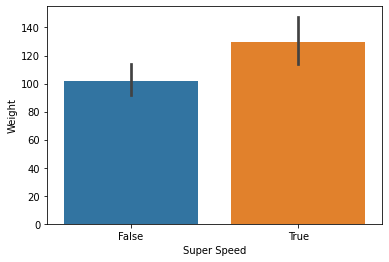

In [38]:
sns.barplot(data=merged, x='Super Speed',y='Weight');

In [39]:
merged.groupby('Publisher')['Height'].mean()

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

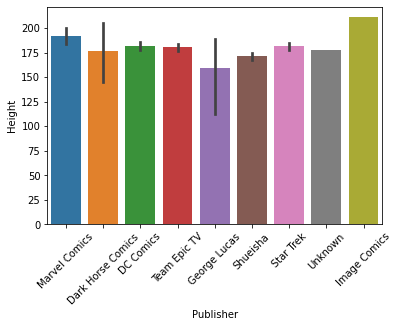

In [40]:
sns.barplot(data=merged, x='Publisher',y='Height');
plt.xticks(rotation=45);